In [1]:
from __future__ import print_function
import keras
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
from keras.layers import Conv2D,MaxPooling2D
from keras.layers import Dense,Dropout,Activation,Flatten,BatchNormalization
from keras.layers.advanced_activations import ELU
import os

num_classes=20
img_rows,img_cols=32,32
batch_size=16

train_data_dir='C:\\Users\\kapri\\Desktop\\simpsons\\train'
validation_data_dir='C:\\Users\\kapri\\Desktop\\simpsons\\validation'

#using some data argumentation
train_datagen=ImageDataGenerator(rescale=1./255,
                                rotation_range=30,
                                width_shift_range=0.3,
                                height_shift_range=0.3,
                                horizontal_flip=True,
                                fill_mode='nearest')

validation_datagen=ImageDataGenerator(rescale=1./255)

train_generator=train_datagen.flow_from_directory(train_data_dir,
                                                 target_size=(img_rows,img_cols),
                                                 batch_size=batch_size,
                                                 class_mode='categorical')

validation_generator=validation_datagen.flow_from_directory(validation_data_dir,
                                                           target_size=(img_rows,img_cols),
                                                           batch_size=batch_size,
                                                           class_mode='categorical')




Using TensorFlow backend.


Found 19548 images belonging to 20 classes.
Found 990 images belonging to 20 classes.


In [3]:
model=Sequential()

#1st CONV and RELU layer
model.add(Conv2D(64,(3,3),padding='same',input_shape=(img_rows,img_cols,3)))
model.add(Activation('relu'))
model.add(BatchNormalization())

#2nd layer
model.add(Conv2D(64,(3,3),padding='same',input_shape=(img_rows,img_cols,3)))
model.add(Activation('relu'))
model.add(BatchNormalization())

#MaxPooling with dropout
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.2))

#3rd layer 
model.add(Conv2D(128,(3,3),padding='same'))
model.add(Activation('relu'))
model.add(BatchNormalization())

#4th layer
model.add(Conv2D(128,(3,3),padding='same'))
model.add(Activation('relu'))
model.add(BatchNormalization())

#MaxPooling layer
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.2))

#5th layer
model.add(Conv2D(256,(3,3),padding='same'))
model.add(Activation('relu'))
model.add(BatchNormalization())

#6th layer
model.add(Conv2D(256,(3,3),padding='same'))
model.add(Activation('relu'))
model.add(BatchNormalization())

#MaxPooling layer
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.2))

#first FC layer
model.add(Flatten())
model.add(Dense(256))
model.add(Activation('relu'))
model.add(BatchNormalization())
model.add(Dropout(0.5))

#second FC
model.add(Dense(256))
model.add(Activation('relu'))
model.add(BatchNormalization())
model.add(Dropout(0.5))

#final FC
model.add(Dense(num_classes))
model.add(Activation('softmax'))

print(model.summary())

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_7 (Conv2D)            (None, 32, 32, 64)        1792      
_________________________________________________________________
activation_8 (Activation)    (None, 32, 32, 64)        0         
_________________________________________________________________
batch_normalization_8 (Batch (None, 32, 32, 64)        256       
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 32, 32, 64)        36928     
_________________________________________________________________
activation_9 (Activation)    (None, 32, 32, 64)        0         
_________________________________________________________________
batch_normalization_9 (Batch (None, 32, 32, 64)        256       
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 16, 16, 64)       

## Training our LittleVGG 

In [4]:
from keras.optimizers import RMSprop,SGD,Adam
from keras.callbacks import ModelCheckpoint,EarlyStopping,ReduceLROnPlateau

checkpoint=ModelCheckpoint('simpsons-LittleVGG.h5',
                          monitor='val_loss',
                          mode='min',
                          save_best_only=True,
                          verbose=1)

earlystop=EarlyStopping(monitor='val_loss',
                       min_delta=0,
                       patience=3,
                       verbose=1,
                       restore_best_weights=True)

reduce_lr=ReduceLROnPlateau(monitor='val_loss',
                           factor=0.2,
                           patience=3,
                           verbose=1,
                           min_delta=0.00001)

# we put callbacks in callbacks list
callbacks=[earlystop,checkpoint,reduce_lr]

#we use samall lr
model.compile(loss='categorical_crossentropy',
             optimizer=Adam(lr=0.01),
             metrics=['accuracy'])

nb_train_samples=19548
nb_validation_samples=990
epochs=10

history=model.fit_generator(train_generator,
                           steps_per_epoch=nb_train_samples//batch_size,
                           epochs=epochs,
                           callbacks=callbacks,
                           validation_data=validation_generator,
                           validation_steps=nb_validation_samples//batch_size)

Epoch 1/10
1221/1221 [==============================] - 143s 117ms/step - loss: 2.9101 - accuracy: 0.1511 - val_loss: 2.8161 - val_accuracy: 0.1557

Epoch 00001: val_loss improved from inf to 2.81609, saving model to simpsons-LittleVGG.h5
Epoch 2/10
1221/1221 [==============================] - 80s 66ms/step - loss: 2.5811 - accuracy: 0.2003 - val_loss: 2.4457 - val_accuracy: 0.2146

Epoch 00002: val_loss improved from 2.81609 to 2.44570, saving model to simpsons-LittleVGG.h5
Epoch 3/10
1221/1221 [==============================] - 86s 70ms/step - loss: 2.4288 - accuracy: 0.2509 - val_loss: 2.6037 - val_accuracy: 0.1417

Epoch 00003: val_loss did not improve from 2.44570
Epoch 4/10
1221/1221 [==============================] - 83s 68ms/step - loss: 2.2396 - accuracy: 0.3096 - val_loss: 2.4281 - val_accuracy: 0.3758

Epoch 00004: val_loss improved from 2.44570 to 2.42814, saving model to simpsons-LittleVGG.h5
Epoch 5/10
1221/1221 [==============================] - 90s 74ms/step - loss: 1.9

## performance Analysis

Found 990 images belonging to 20 classes.
Confusion Matrix
[[28  0  1  0  0  0  1 15  1  0  0  0  1  1  0  0  0  0  0  0]
 [ 0 49  0  0  0  0  0  0  0  1  0  0  0  0  0  0  0  0  0  0]
 [ 0  0 34  1  1  0  0  5  0  3  1  0  0  2  0  0  1  1  1  0]
 [ 0  0  1 34  0  0  0  4  1  2  1  0  0  1  0  0  0  0  1  3]
 [ 0  1  0  0 46  0  0  0  1  0  0  0  0  0  0  2  0  0  0  0]
 [ 0  0  0  0  4 33  1  0  0  4  1  0  0  1  0  2  0  1  1  1]
 [ 0  1  2  0  0  0 41  1  1  2  0  0  0  0  0  0  1  1  0  0]
 [ 0  0  0  1  0  0  0 49  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  1 46  0  0  0  0  0  0  0  0  0  1  2]
 [ 0  1  0  0  0  0  0  0  0 48  0  0  0  0  0  0  0  0  0  1]
 [ 0  1  0  2  0  0  0  1  1  0 38  0  0  0  0  0  4  0  0  3]
 [ 0  0 18  3  0  0  0  3  0  2  0 20  0  1  1  0  1  0  1  0]
 [ 0  1  0  0  0  0  0  0  1  2  0  0 45  0  0  0  0  0  0  1]
 [ 0  0  0  0  0  2  0  1  1  1  0  0  0 42  0  0  0  0  0  3]
 [ 0  1  0  0  0  0  0  2  0  0  0  0  0  0 44  0  1  0  0 

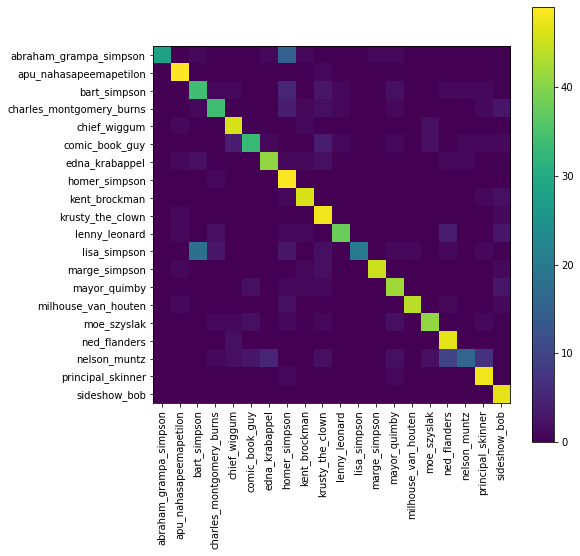

In [5]:
import matplotlib.pyplot as plt
import sklearn
from sklearn.metrics import classification_report, confusion_matrix
import numpy as np

# We need to recreate our validation generator with shuffle = false
validation_generator = validation_datagen.flow_from_directory(
        validation_data_dir,
        target_size=(img_rows, img_cols),
        batch_size=batch_size,
        class_mode='categorical',
        shuffle=False)

class_labels = validation_generator.class_indices
class_labels = {v: k for k, v in class_labels.items()}
classes = list(class_labels.values())

nb_train_samples = 19548
nb_validation_samples = 990

#Confution Matrix and Classification Report
Y_pred = model.predict_generator(validation_generator, nb_validation_samples // batch_size+1)
y_pred = np.argmax(Y_pred, axis=1)

print('Confusion Matrix')
print(confusion_matrix(validation_generator.classes, y_pred))
print('Classification Report')
target_names = list(class_labels.values())
print(classification_report(validation_generator.classes, y_pred, target_names=target_names))

plt.figure(figsize=(8,8))
cnf_matrix = confusion_matrix(validation_generator.classes, y_pred)

plt.imshow(cnf_matrix, interpolation='nearest')
plt.colorbar()
tick_marks = np.arange(len(classes))
_ = plt.xticks(tick_marks, classes, rotation=90)
_ = plt.yticks(tick_marks, classes)

## reloding our classifier

In [7]:
from keras.models import load_model
classifier=load_model=('simpsons-LittleVGG.h5')

## predicting the classifier

In [12]:
from keras.models import load_model
from keras.preprocessing import image
import numpy as np
import os
import cv2
import numpy as np
from os import listdir
from os.path import isfile, join
import re

def draw_test(name, pred, im, true_label):
    BLACK = [0,0,0]
    expanded_image = cv2.copyMakeBorder(im, 160, 0, 0, 300 ,cv2.BORDER_CONSTANT,value=BLACK)
    cv2.putText(expanded_image, "predited - "+ pred, (20, 60) , cv2.FONT_HERSHEY_SIMPLEX,1, (0,0,255), 2)
    cv2.putText(expanded_image, "true - "+ true_label, (20, 120) , cv2.FONT_HERSHEY_SIMPLEX,1, (0,255,0), 2)
    cv2.imshow(name, expanded_image)
    

def getRandomImage(path, img_width, img_height):
    """function loads a random images from a random folder in our test path """
    folders = list(filter(lambda x: os.path.isdir(os.path.join(path, x)), os.listdir(path)))
    random_directory = np.random.randint(0,len(folders))
    path_class = folders[random_directory]
    file_path = path + path_class
    file_names = [f for f in listdir(file_path) if isfile(join(file_path, f))]
    random_file_index = np.random.randint(0,len(file_names))
    image_name = file_names[random_file_index]
    final_path = file_path + "\\" + image_name
    return image.load_img(final_path, target_size = (img_width, img_height)), final_path, path_class

# dimensions of our images
img_width, img_height = 32, 32

files = []
predictions = []
true_labels = []

# predicting images
for i in range(0, 10):
    path = 'C:\\Users\\kapri\\Desktop\\simpsons\\validation\\' 
    img, final_path, true_label = getRandomImage(path, img_width, img_height)
    files.append(final_path)
    true_labels.append(true_label)
    x = image.img_to_array(img)
    x = x * 1./255
    x = np.expand_dims(x, axis=0)
    images = np.vstack([x])
    classes = classifier.predict_classes(images, batch_size = 10)
    predictions.append(classes)
    
for i in range(0, len(files)):
    image = cv2.imread((files[i]))
    image = cv2.resize(image, None, fx=5, fy=5, interpolation = cv2.INTER_CUBIC)
    draw_test("Prediction", class_labels[predictions[i][0]], image, true_labels[i])
    cv2.waitKey(0)

cv2.destroyAllWindows()

AttributeError: 'str' object has no attribute 'predict_classes'